In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib import cm
mlp.rcParams['font.size'] = 12

In [5]:
raw_data = pd.read_csv('../input/comptab_2018-01-29 16_00_comma_separated.csv')
raw_data.drop(raw_data[raw_data['Year']==2017].index,inplace=True)
raw_data.head(3)

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W


In [6]:
def plot_labels_values(series):
    labels = [idx for idx in series.index]
    values = [value for value in series.values]
    index = [x for x in range(len(series))]
    return labels,values,index

## Total trading records by App. & Taxon

In [7]:
# total kinds of taxons traded by CITES Appendix(in which Appendix I is the most endangered)
taxon_trade_records = raw_data.groupby(['App.','Taxon'])['Taxon'].value_counts()
app_count = taxon_trade_records.groupby(level=0).count()
app_count

App.
I       523
II     5730
III      90
N        57
Name: Taxon, dtype: int64

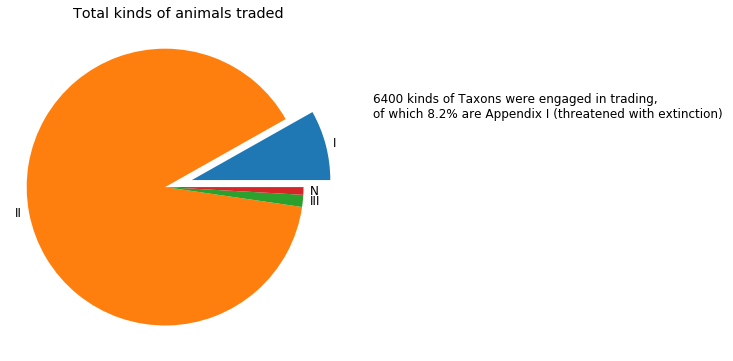

In [8]:
fig,ax = plt.subplots(figsize=[6,6])
labels,values,index = plot_labels_values(app_count)
comments = '6400 kinds of Taxons were engaged in trading,\n of which 8.2% are Appendix I (threatened with extinction)'
explode = [0.2,0,0,0]
ax.pie(values, labels = labels,explode=explode,labeldistance=1.05)
ax.axis('equal')
ax.set_title('Total kinds of animals traded')
ax.text(1.5,0.5,comments,wrap = True)
plt.show()

In [9]:
# total trades by taxons(import or export records)
top_traded_taxon = taxon_trade_records.groupby(level=1).sum().sort_values(ascending = False).head(10)
top_traded_taxon

Taxon
Crocodylus niloticus          2410
Python reticulatus            2304
Alligator mississippiensis    2081
Crocodylus porosus            1404
Varanus salvator               956
Python bivittatus              925
Acipenser baerii               911
Loxodonta africana             851
Macaca fascicularis            793
Varanus niloticus              734
Name: Taxon, dtype: int64

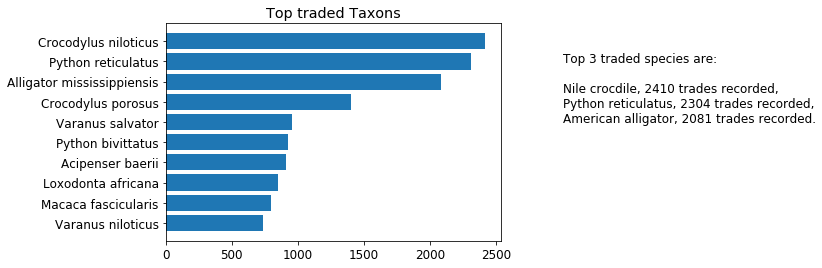

In [10]:
fig,ax = plt.subplots()
labels,values,index = plot_labels_values(top_traded_taxon.sort_values())
ax.barh(index,values)
plt.yticks(index,labels)
ax.set_title('Top traded Taxons')
comments = 'Top 3 traded species are:\n'\
            '\n'\
            'Nile crocdile, 2410 trades recorded,\n'\
            'Python reticulatus, 2304 trades recorded,\n'\
            'American alligator, 2081 trades recorded.'
ax.text(3000,5,comments)
plt.show()

## Total trading records by countries

In [11]:
countries = raw_data.groupby(['Exporter','Importer'])['Taxon'].value_counts()
exporter = countries.groupby(level=0).sum()
importer = countries.groupby(level=1).sum()

country_records = pd.concat([exporter,importer],axis=1).fillna(0)
country_records.columns = ['Import','Export']
country_records['Total_trades'] = country_records['Export'] + country_records['Import']
country_records.sort_values(by='Total_trades',ascending=False).head(10)

,Import,Export,Total_trades
US,4501.0,9616.0,14117.0
NL,7198.0,752.0,7950.0
DE,2651.0,4839.0,7490.0
ID,6526.0,377.0,6903.0
IT,5116.0,1198.0,6314.0
FR,3736.0,2569.0,6305.0
JP,1053.0,5185.0,6238.0
CH,1484.0,2496.0,3980.0
CN,1506.0,2112.0,3618.0
HK,847.0,2549.0,3396.0


## Top trading purposes

In [12]:
purpose_code = {'B':'Breeding in captivity or artificial propagation',
                 'E':'Educational',
                 'G':'Botanical garden',
                 'H':'Hunting trophy',
                 'L':'Law enforcement / judicial / forensic',
                 'M':'Medical (including biomedical research)',
                 'N':'Reintroduction or introduction into the wild',
                 'P':'Personal',
                 'Q':'Circus or travelling exhibition',
                 'S':'Scientific',
                 'T':'Commercial',
                 'Z':'Zoo'}
trading_purposes = raw_data['Purpose'].value_counts()
trading_purposes.rename(index=purpose_code,inplace=True)

<function matplotlib.pyplot.show>

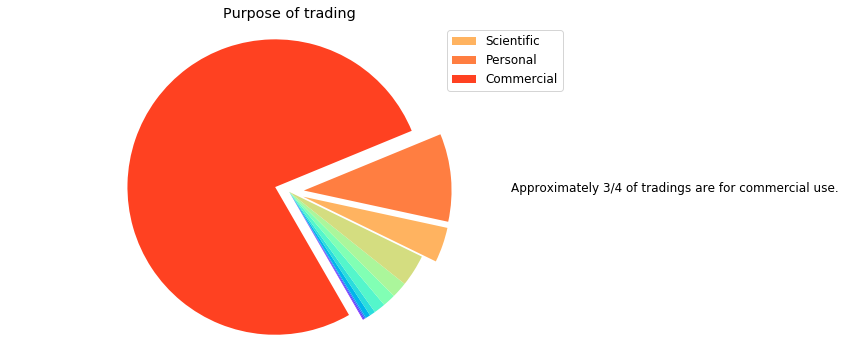

In [13]:
fig,ax = plt.subplots(figsize=[10,6])
labels,values,index = plot_labels_values(trading_purposes.sort_values())
colors = cm.rainbow(np.arange(len(index))/len(index))
explode = [0]*(len(index)-3) + [0.1]*3
comments = 'Approximately 3/4 of tradings are for commercial use.'
patches,text = ax.pie(values,colors=colors,explode=explode,startangle=300)
ax.set_title('Purpose of trading')
ax.axis('equal')
ax.legend(patches[-3:],labels[-3:])
ax.text(1.5,0,comments)
plt.show

## African elephant trades

In [14]:
ae_trades = raw_data[raw_data['Taxon'] == 'Loxodonta africana']
terms_of_trading = ae_trades.groupby('Term')['Importer reported quantity'].count().sort_values(ascending = False)
terms_of_trading.sum()

432

In [15]:
terms_of_trading[:3]

Term
ivory carvings    111
tusks              79
trophies           61
Name: Importer reported quantity, dtype: int64

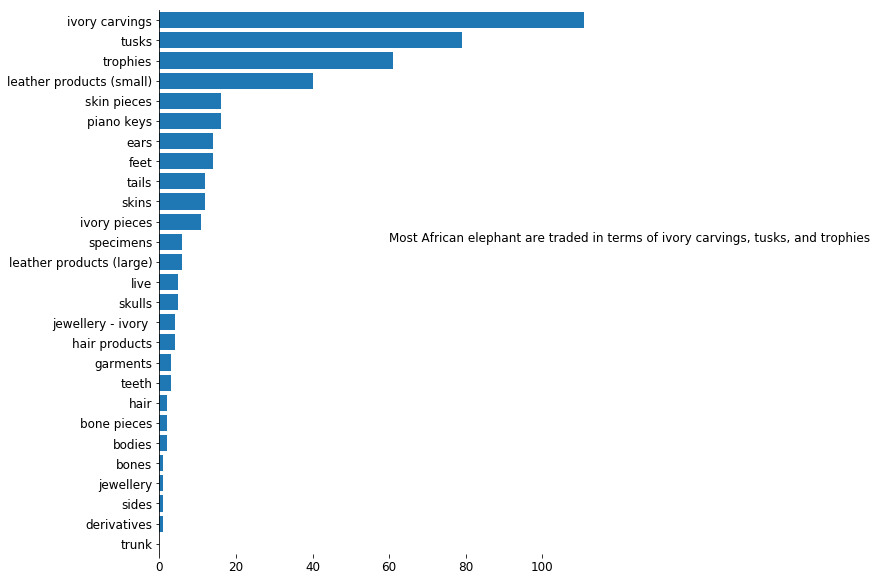

In [16]:
fig,ax = plt.subplots(figsize=[8,10])
labels,values,index = plot_labels_values(terms_of_trading.sort_values())
ax.barh(index,values)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
comments = 'Most African elephant are traded in terms of ivory carvings, tusks, and trophies'
ax.text(60,15,comments,wrap = True)
plt.ylim(min(index)-0.5, max(index)+0.5)
plt.yticks(index,labels)
plt.show()

In [17]:
importer_terms = ae_trades.loc[ae_trades['Term'].isin(['ivory carvings', 'tusks', 'trophies'])]\
                .groupby(['Importer','Term'])['Importer reported quantity'].sum().unstack()

In [18]:
top_ivory_importer = importer_terms.sort_values(by='ivory carvings',ascending = False).head(5).fillna(0)

In [19]:
top_ivory_importer

Term,ivory carvings,trophies,tusks
Importer,,,
US,440.0,122.00,100.0
HK,329.5,0.00,386.0
JP,294.0,0.00,0.0
GB,205.0,15.00,38.0
FR,188.0,14.96,0.0
